In [33]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import statsmodels.api as sm
import matplotlib.pyplot as plt
from scipy.stats import binom_test
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from scipy.stats import binom

In [3]:
# Cargaremos el archivo Excel modificado que el usuario acaba de subir
file_path_excel_modificado = 'dataset_empleados.xlsx'

In [4]:
# Utilizamos Pandas para cargar el archivo Excel modificado
df_empleados_excel_modificado = pd.read_excel(file_path_excel_modificado)

# Mostrar las primeras filas del DataFrame modificado para verificar su carga
df_empleados_excel_modificado.head()

,ID,Genero,Nivel_Educacion,Edad,Experiencia_Laboral,Especializacion,Lenguajes_Programacion,Tipo_Empresa,Ubicacion_Geografica,Salario,Horas_Trabajo,Proyectos_Actuales
0,1,Masculino,Licenciatura,28,6,Desarrollo Web,"JavaScript, HTML, CSS",Startup,"Nueva York, EE. UU.",60000,40,Aplicación Móvil
1,2,Femenino,Maestría,35,10,Seguridad,"Python, C++, Java",Corporación,"San Francisco, EE. UU.",80000,45,Análisis de Datos
2,3,Masculino,Licenciatura,26,4,Desarrollo Móvil,"Swift, Java",Startup,"Londres, Reino Unido",55000,42,Juegos en Línea
3,4,Femenino,Doctorado,40,15,Inteligencia Artificial,"Python, R",Startup,"Toronto, Canadá",95000,50,Robótica
4,5,No Binario,Licenciatura,30,7,Análisis de Datos,"SQL, R",Agencia,"Washington, D.C., EE. UU.",62000,38,Ciberseguridad


In [5]:
# Calculamos el promedio de edad y experiencia laboral separados por género
promedios_por_genero = df_empleados_excel_modificado.groupby('Genero').agg({
    'Edad': 'mean',
    'Experiencia_Laboral': 'mean'
})

promedios_por_genero


,Edad,Experiencia_Laboral
Genero,,
Femenino,36.608696,11.434783
Masculino,31.157895,7.315789
No Binario,31.857143,7.857143


In [6]:
# Extraemos la columna de horas de trabajo del DataFrame modificado
horas_trabajo_modificado = df_empleados_excel_modificado['Horas_Trabajo']

# Calculamos la media y la desviación estándar de las horas de trabajo
media_horas_modificado = np.mean(horas_trabajo_modificado)
std_horas_modificado = np.std(horas_trabajo_modificado, ddof=1)  # ddof=1 para muestra

# Número de observaciones
n_modificado = len(horas_trabajo_modificado)

# Calculamos el intervalo de confianza del 95% para la media
confianza = 0.95
sem_modificado = std_horas_modificado / np.sqrt(n_modificado)  # Error estándar de la media
intervalo_confianza_modificado = stats.t.interval(confianza, df=n_modificado-1, loc=media_horas_modificado, scale=sem_modificado)


print("intervalo de confianza sobre las horas de trabajo",intervalo_confianza_modificado)


intervalo de confianza sobre las horas de trabajo (42.54906633573436, 44.675423460184014)


In [7]:
#Intervalo de confianza sin T student
# Extraemos la columna de horas de trabajo del DataFrame modificado
horas_trabajo_modificado = df_empleados_excel_modificado['Horas_Trabajo']

# Calculamos la media y la desviación estándar de las horas de trabajo
media_horas_modificado = np.mean(horas_trabajo_modificado)
std_horas_modificado = np.std(horas_trabajo_modificado, ddof=1)  # ddof=1 para muestra

# Número de observaciones
n_modificado = len(horas_trabajo_modificado)

# Calculamos el intervalo de confianza del 95% para la media
confianza = 0.95
sem_modificado = std_horas_modificado / np.sqrt(n_modificado)
intervalo_confianza_modificado = stats.norm.interval(confianza, loc=media_horas_modificado, scale=sem_modificado)

print("intervalo de confianza sobre las horas de trabajo",intervalo_confianza_modificado)

intervalo de confianza sobre las horas de trabajo (42.57585990251015, 44.64862989340822)


In [9]:
# Preparación de los datos para el modelo de regresión lineal
X = df_empleados_excel_modificado['Edad']  # Variable independiente
y = df_empleados_excel_modificado['Salario']  # Variable dependiente

# Agregar una constante a la variable independiente
X = sm.add_constant(X)

# Crear el modelo de regresión lineal
modelo = sm.OLS(y, X).fit()

# Obtener el resumen del modelo
resumen_modelo = modelo.summary()
resumen_modelo


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Salario   R-squared:                       0.866
Model:                            OLS   Adj. R-squared:                  0.863
Method:                 Least Squares   F-statistic:                     304.3
Date:                Fri, 17 Nov 2023   Prob (F-statistic):           3.67e-22
Time:                        14:52:09   Log-Likelihood:                -481.86
No. Observations:                  49   AIC:                             967.7
Df Residuals:                      47   BIC:                             971.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.037e+04   4901.931     -2.115      0.040   -2.02e+04    -507.158
Edad        2505.7695    143.644     17.444      0.000    2216.795    2794.744
==============================================================================
Omnibus:                        1.085   Durbin-Watson:                   2.754
Prob(Omnibus):                  0.581   Jarque-Bera (JB):                1.099
Skew:                           0.247   Prob(JB):                        0.577
Kurtosis:                       2.458   Cond. No.                         254.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [10]:
# Suponiendo que df_empleados_excel_modificado es tu DataFrame
correlacion = df_empleados_excel_modificado['Edad'].corr(df_empleados_excel_modificado['Salario'])

print(f"Coeficiente de correlación de Pearson: {correlacion}")

Coeficiente de correlación de Pearson: 0.930705317724075


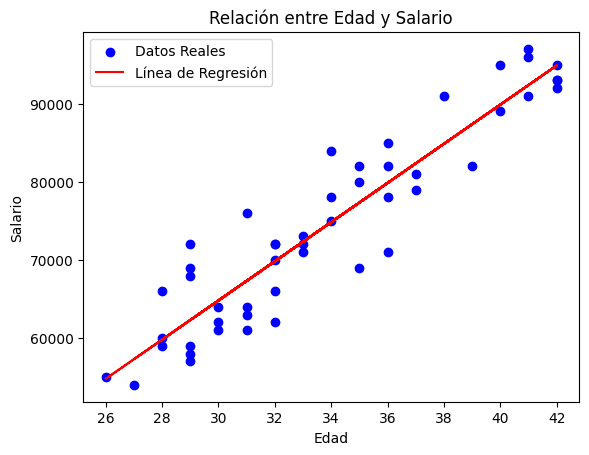

In [11]:
# Obtenemos los valores de la edad y los salarios predichos por el modelo
X_valores = df_empleados_excel_modificado['Edad']
y_pred = modelo.predict()

# Gráfico de dispersión de los datos reales
plt.scatter(X_valores, y, label='Datos Reales', color='blue')

# Línea de tendencia del modelo de regresión
plt.plot(X_valores, y_pred, label='Línea de Regresión', color='red')

# Etiquetas y leyenda
plt.title('Relación entre Edad y Salario')
plt.xlabel('Edad')
plt.ylabel('Salario')
plt.legend()

# Mostrar el gráfico
plt.show()


In [12]:
# Calculamos el coeficiente de correlación de Pearson entre la edad y el salario
coef_correlacion = df_empleados_excel_modificado['Edad'].corr(df_empleados_excel_modificado['Salario'])

print("Correlacion edad y salario:", coef_correlacion)

Correlacion edad y salario: 0.930705317724075


Coeficiente de correlación de Pearson: 0.9659206584056843


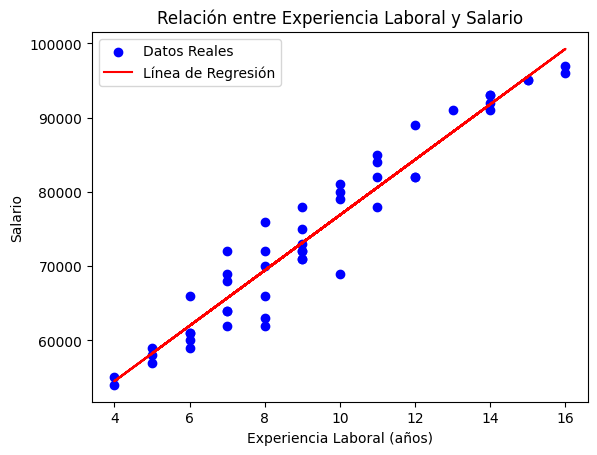

In [13]:
# Calcular la correlación lineal
correlacion = df_empleados_excel_modificado['Experiencia_Laboral'].corr(df_empleados_excel_modificado['Salario'])
print(f"Coeficiente de correlación de Pearson: {correlacion}")

# Preparación de los datos para el modelo de regresión lineal
X = df_empleados_excel_modificado['Experiencia_Laboral']  # Variable independiente
y = df_empleados_excel_modificado['Salario']  # Variable dependiente

# Agregar una constante a la variable independiente
X = sm.add_constant(X)

# Crear el modelo de regresión lineal
modelo = sm.OLS(y, X).fit()

# Obtener los valores predichos por el modelo
y_pred = modelo.predict(X)

# Gráfico de dispersión de los datos reales
plt.scatter(df_empleados_excel_modificado['Experiencia_Laboral'], df_empleados_excel_modificado['Salario'], label='Datos Reales', color='blue')

# Línea de tendencia del modelo de regresión
plt.plot(df_empleados_excel_modificado['Experiencia_Laboral'], y_pred, label='Línea de Regresión', color='red')

# Etiquetas y leyenda
plt.title('Relación entre Experiencia Laboral y Salario')
plt.xlabel('Experiencia Laboral (años)')
plt.ylabel('Salario')
plt.legend()

# Mostrar el gráfico
plt.show()

Coeficiente de correlación de Pearson entre Edad y Salario: 0.930705317724075
Coeficiente de correlación de Pearson entre Experiencia Laboral y Salario: 0.9659206584056843


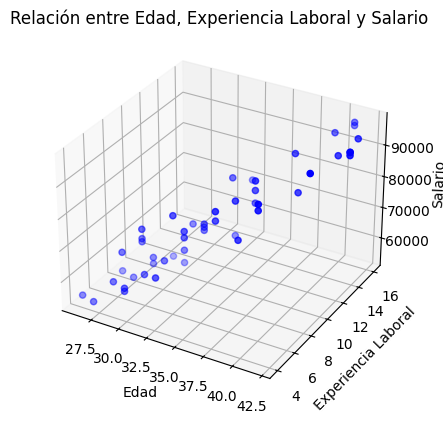

In [14]:
# Calcular las correlaciones lineales
correlacion_edad_salario = df_empleados_excel_modificado['Edad'].corr(df_empleados_excel_modificado['Salario'])
correlacion_experiencia_salario = df_empleados_excel_modificado['Experiencia_Laboral'].corr(df_empleados_excel_modificado['Salario'])

print(f"Coeficiente de correlación de Pearson entre Edad y Salario: {correlacion_edad_salario}")
print(f"Coeficiente de correlación de Pearson entre Experiencia Laboral y Salario: {correlacion_experiencia_salario}")

# Gráfico de dispersión 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Datos para el gráfico
x = df_empleados_excel_modificado['Edad']
y = df_empleados_excel_modificado['Experiencia_Laboral']
z = df_empleados_excel_modificado['Salario']

# Crear el gráfico de dispersión
ax.scatter(x, y, z, color='b')

# Etiquetas y título
ax.set_xlabel('Edad')
ax.set_ylabel('Experiencia Laboral')
ax.set_zlabel('Salario')
ax.set_title('Relación entre Edad, Experiencia Laboral y Salario')

# Mostrar el gráfico
plt.show()

In [15]:
# Cargar el dataset
file_path = 'dataset_empleados.xlsx'
data = pd.read_excel(file_path)

# Contar el número de mujeres en la muestra
num_mujeres = data['Genero'].str.strip().str.lower().value_counts().get('femenino', 0)
total_empleados = len(data)

# Proporción observada de mujeres en la muestra
proporcion_mujeres = num_mujeres / total_empleados

# Nueva hipótesis nula
p_h0_nueva = 0.32

# Realizar el test de hipótesis con la nueva hipótesis nula
# Usando 'greater' como alternativa porque H1: p > 0.19
p_value_nueva = binom_test(num_mujeres, total_empleados, p_h0_nueva, alternative='greater')

# Imprimir los resultados
print("Número de mujeres en la muestra:", num_mujeres)
print("Total de empleados en la muestra:", total_empleados)
print("Proporción observada de mujeres:", proporcion_mujeres)
print("Valor p del test de hipótesis:", p_value_nueva)


Número de mujeres en la muestra: 23
Total de empleados en la muestra: 49
Proporción observada de mujeres: 0.46938775510204084
Valor p del test de hipótesis: 0.020543795543531772


C:\Users\DireC\AppData\Local\Temp\ipykernel_7032\3086246041.py:17: DeprecationWarning: 'binom_test' is deprecated in favour of 'binomtest' from version 1.7.0 and will be removed in Scipy 1.12.0.
  p_value_nueva = binom_test(num_mujeres, total_empleados, p_h0_nueva, alternative='greater')


In [16]:
# Agrupa por 'Nivel_Educacion' y realiza cálculos estadísticos
resumen_estadistico = df_empleados_excel_modificado.groupby('Nivel_Educacion')['Salario'].agg(['count', 'mean', 'std'])

# Renombra las columnas para mayor claridad
resumen_estadistico.columns = ['Tamaño Muestra', 'Salario Promedio', 'Desviación Estándar Muestral']

# Muestra el resumen estadístico
print(resumen_estadistico)

# Crear subconjuntos de datos para cada nivel de educación
licenciatura = df_empleados_excel_modificado[df_empleados_excel_modificado['Nivel_Educacion'] == 'Licenciatura']['Salario']
maestria = df_empleados_excel_modificado[df_empleados_excel_modificado['Nivel_Educacion'] == 'Maestría']['Salario']
doctorado = df_empleados_excel_modificado[df_empleados_excel_modificado['Nivel_Educacion'] == 'Doctorado']['Salario']

# Calcular el valor p para la diferencia de salarios entre Licenciado y Maestría
t_statistic_lm, p_value_lm = stats.ttest_ind(licenciatura, maestria, equal_var=False)

# Calcular el valor p para la diferencia de salarios entre Licenciado y Doctorado
t_statistic_ld, p_value_ld = stats.ttest_ind(licenciatura, doctorado, equal_var=False)

# Calcular el valor p para la diferencia de salarios entre Maestría y Doctorado
t_statistic_md, p_value_md = stats.ttest_ind(maestria, doctorado, equal_var=False)

# Mostrar los resultados
print(f"Valor p para la diferencia de salarios entre Licenciado y Maestría: {p_value_lm}")
print(f"Valor p para la diferencia de salarios entre Licenciado y Doctorado: {p_value_ld}")
print(f"Valor p para la diferencia de salarios entre Maestría y Doctorado: {p_value_md}")

                 Tamaño Muestra  Salario Promedio   
Nivel_Educacion                                     
Doctorado                    11      92181.818182  \
Licenciatura                 22      63545.454545   
Maestría                     16      77000.000000   

                 Desviación Estándar Muestral  
Nivel_Educacion                                
Doctorado                         4142.901925  
Licenciatura                      5820.548761  
Maestría                          5163.977795  
Valor p para la diferencia de salarios entre Licenciado y Maestría: 9.222165029164338e-09
Valor p para la diferencia de salarios entre Licenciado y Doctorado: 1.8297165779097205e-15
Valor p para la diferencia de salarios entre Maestría y Doctorado: 1.0699020084636842e-08


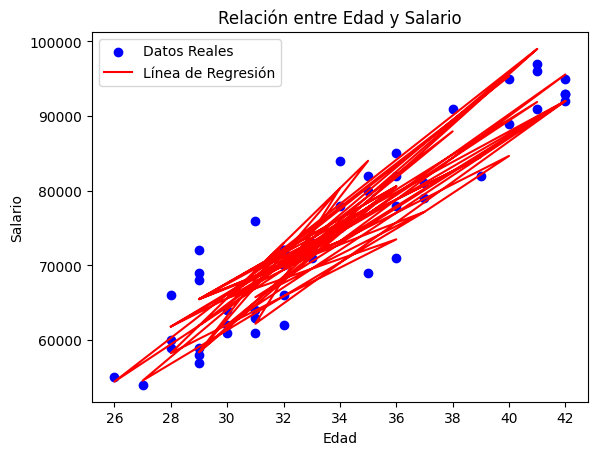

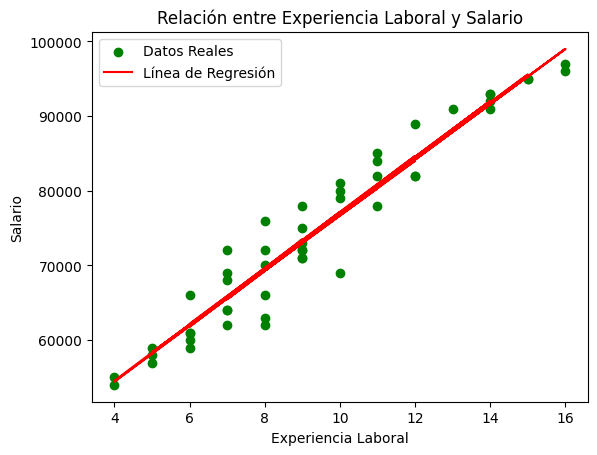

In [17]:
# Suponiendo que df_empleados_excel_modificado es tu DataFrame

# Preparación de los datos para el modelo de regresión lineal múltiple
X = df_empleados_excel_modificado[['Edad', 'Experiencia_Laboral']]  # Variables independientes
y = df_empleados_excel_modificado['Salario']  # Variable dependiente

# Agregar una constante a las variables independientes
X = sm.add_constant(X)

# Crear el modelo de regresión lineal múltiple
modelo = sm.OLS(y, X).fit()

# Predicciones del modelo
df_empleados_excel_modificado['Predicciones'] = modelo.predict(X)

# Gráfico de dispersión para Edad vs Salario
plt.scatter(df_empleados_excel_modificado['Edad'], df_empleados_excel_modificado['Salario'], color='blue', label='Datos Reales')
plt.plot(df_empleados_excel_modificado['Edad'], df_empleados_excel_modificado['Predicciones'], color='red', label='Línea de Regresión')
plt.title('Relación entre Edad y Salario')
plt.xlabel('Edad')
plt.ylabel('Salario')
plt.legend()
plt.show()

# Gráfico de dispersión para Experiencia Laboral vs Salario
plt.scatter(df_empleados_excel_modificado['Experiencia_Laboral'], df_empleados_excel_modificado['Salario'], color='green', label='Datos Reales')
plt.plot(df_empleados_excel_modificado['Experiencia_Laboral'], df_empleados_excel_modificado['Predicciones'], color='red', label='Línea de Regresión')
plt.title('Relación entre Experiencia Laboral y Salario')
plt.xlabel('Experiencia Laboral')
plt.ylabel('Salario')
plt.legend()
plt.show()


In [18]:
# Calcular el coeficiente de correlación de Pearson para Edad y Salario
correlacion_edad_salario = df_empleados_excel_modificado['Edad'].corr(df_empleados_excel_modificado['Salario'])

# Calcular el coeficiente de correlación de Pearson para Experiencia Laboral y Salario
correlacion_experiencia_salario = df_empleados_excel_modificado['Experiencia_Laboral'].corr(df_empleados_excel_modificado['Salario'])

print(f"Coeficiente de correlación de Pearson entre Edad y Salario: {correlacion_edad_salario}")
print(f"Coeficiente de correlación de Pearson entre Experiencia Laboral y Salario: {correlacion_experiencia_salario}")

Coeficiente de correlación de Pearson entre Edad y Salario: 0.930705317724075
Coeficiente de correlación de Pearson entre Experiencia Laboral y Salario: 0.9659206584056843


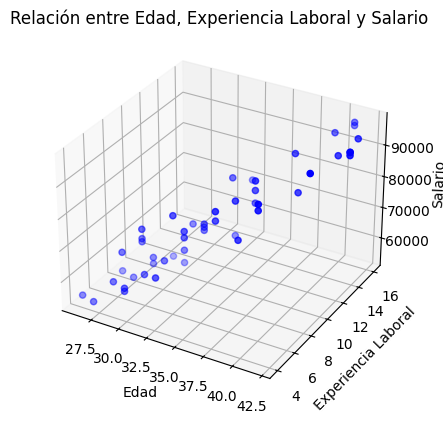

In [19]:
# Datos para el gráfico
x = df_empleados_excel_modificado['Edad']
y = df_empleados_excel_modificado['Experiencia_Laboral']
z = df_empleados_excel_modificado['Salario']

# Crear un gráfico de dispersión 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(x, y, z, color='b')

# Etiquetas y título
ax.set_xlabel('Edad')
ax.set_ylabel('Experiencia Laboral')
ax.set_zlabel('Salario')
ax.set_title('Relación entre Edad, Experiencia Laboral y Salario')

# Mostrar el gráfico
plt.show()

In [20]:
# Suponiendo que df_empleados_excel_modificado ya está definido y contiene tus datos
# Selecciona los primeros 6 empleados
primeros_seis_empleados = df_empleados_excel_modificado.head(6)

# Muestra la tabla con los años, la experiencia laboral y el salario de los 6 primeros empleados
tabla_primeros_seis = primeros_seis_empleados[['Edad', 'Experiencia_Laboral', 'Salario']]

# Imprimir la tabla
tabla_primeros_seis


,Edad,Experiencia_Laboral,Salario
0,28,6,60000
1,35,10,80000
2,26,4,55000
3,40,15,95000
4,30,7,62000
5,32,9,72000


In [21]:
import pandas as pd
from scipy.stats import pearsonr

# Suponiendo que df_empleados_excel_modificado es tu DataFrame y ya está cargado con los datos
edad = df_empleados_excel_modificado['Edad']
experiencia = df_empleados_excel_modificado['Experiencia_Laboral']
salario = df_empleados_excel_modificado['Salario']

# Calcular el coeficiente de Pearson entre Edad y Salario
coeficiente_edad_salario, p_valor_edad_salario = pearsonr(edad, salario)

# Calcular el coeficiente de Pearson entre Experiencia Laboral y Salario
coeficiente_experiencia_salario, p_valor_experiencia_salario = pearsonr(experiencia, salario)

# Mostrar los coeficientes de Pearson y los p-valores
print("Coeficiente de Pearson entre Edad y Salario:", coeficiente_edad_salario, "P-valor:", p_valor_edad_salario)
print("Coeficiente de Pearson entre Experiencia Laboral y Salario:", coeficiente_experiencia_salario, "P-valor:", p_valor_experiencia_salario)


Coeficiente de Pearson entre Edad y Salario: 0.9307053177240754 P-valor: 3.665927810974944e-22
Coeficiente de Pearson entre Experiencia Laboral y Salario: 0.965920658405684 P-valor: 3.092782034900296e-29


In [23]:
# Cargar los datos
# df_empleados = pd.read_csv('ruta_a_tu_archivo.csv')

# Filtrar para incluir solo a los empleados con licenciatura
df_licenciados = df_empleados_excel_modificado[df_empleados_excel_modificado['Nivel_Educacion'] == 'Licenciatura']

# Calcular la media y la desviación estándar de los salarios de los licenciados
media_salario_licenciados = np.mean(df_licenciados['Salario'])
std_salario_licenciados = np.std(df_licenciados['Salario'], ddof=1)  # ddof=1 para muestra

# Número de observaciones (licenciados)
n_licenciados = len(df_licenciados)

# Calcular el intervalo de confianza del 95% para la media
confianza = 0.95
sem_licenciados = std_salario_licenciados / np.sqrt(n_licenciados)
intervalo_confianza_licenciados = stats.norm.interval(confianza, loc=media_salario_licenciados, scale=sem_licenciados)

print("Intervalo de confianza del 95% para el salario medio de los licenciados:", intervalo_confianza_licenciados)

Intervalo de confianza del 95% para el salario medio de los licenciados: (61113.24671444067, 65977.66237646842)


In [25]:
# Cargar los datos
# df_empleados = pd.read_csv('ruta_a_tu_archivo.csv')

# Separar los salarios por género
salarios_masculinos = df_empleados_excel_modificado[df_empleados_excel_modificado['Genero'] == 'Masculino']['Salario']
salarios_femeninos = df_empleados_excel_modificado[df_empleados_excel_modificado['Genero'] == 'Femenino']['Salario']

# Realizar el t-test
t_stat, p_valor = stats.ttest_ind(salarios_masculinos, salarios_femeninos, equal_var=False)

# Imprimir los resultados
print("Estadístico t:", t_stat)
print("P-valor:", p_valor)

# Interpretar el resultado
nivel_significancia = 0.05
if p_valor < nivel_significancia:
    print("Rechazamos la hipótesis nula: Existe una diferencia significativa en los salarios medios entre géneros.")
else:
    print("No rechazamos la hipótesis nula: No hay diferencia significativa en los salarios medios entre géneros.")


Estadístico t: -4.8596793671720215
P-valor: 1.986173692895657e-05
Rechazamos la hipótesis nula: Existe una diferencia significativa en los salarios medios entre géneros.


In [28]:
# Cargar los datos
# df_empleados = pd.read_csv('ruta_a_tu_archivo.csv')

# Filtrar para incluir solo a las mujeres
mujeres = df_empleados_excel_modificado[df_empleados_excel_modificado['Genero'] == 'Femenino']

# Filtrar para incluir solo a las mujeres con doctorado
mujeres_doctorado = mujeres[mujeres['Nivel_Educacion'] == 'Doctorado']

# Calcular la proporción
proporcion_mujeres_doctorado = len(mujeres_doctorado) / len(df_empleados_excel_modificado)
# O, si prefieres la proporción respecto al total de mujeres:
# proporcion_mujeres_doctorado = len(mujeres_doctorado) / len(mujeres)

# Imprimir la proporción
print("Proporción de mujeres con doctorado en el dataset:", proporcion_mujeres_doctorado)


Proporción de mujeres con doctorado en el dataset: 0.20408163265306123


In [30]:
# Cargar los datos
# df_empleados = pd.read_csv('ruta_a_tu_archivo.csv')

# Filtrar para incluir solo a los empleados con doctorado
empleados_doctorado = df_empleados_excel_modificado[df_empleados_excel_modificado['Nivel_Educacion'] == 'Doctorado']

# Calcular la proporción
proporcion_doctorado = len(empleados_doctorado) / len(df_empleados_excel_modificado)

# Imprimir la proporción
print("Proporción de empleados con doctorado en el dataset:", proporcion_doctorado)


Proporción de empleados con doctorado en el dataset: 0.22448979591836735
